# Rapport Final

## Vue générale  

In [4]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np
path = "../data/txt/"
files = sorted(os.listdir(path))
all_years = [str(year) for year in range(1847, 1979)]
dic = defaultdict(int)
dic2 = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f:
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        dic[decade] += 1
        dic2[city] += 1
        dic2[tome] += 1
    else:
        print(f"Anomalous file: {f}")
missing_years = [y for y in all_years if y not in covered_years]
print(f"Missing years: {', '.join(missing_years)}")

Anomalous file: bul
Missing years: 1853, 1875, 1916, 1917, 1940, 1941, 1942, 1943, 1944


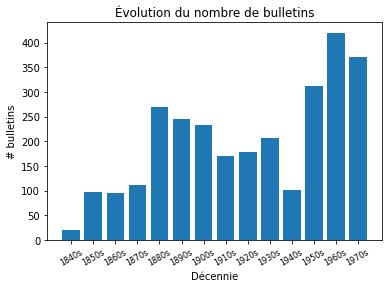

In [5]:
def plot_bar():
    index = np.arange(len(dic))
    plt.bar(index, dic.values())
    plt.xlabel('Décennie')
    plt.ylabel('# bulletins')
    plt.xticks(index, dic.keys(), fontsize=8, rotation=30)
    plt.title('Évolution du nombre de bulletins')
    plt.show()

plot_bar()

## Analyse des bulletins 

In [7]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "vers", "quelque", "car", "quel", "abord", "parce", 
       "leurs", "chez", "aucun", "alors", "auquel", "tandis", "quand", "devons", "donne", 
       "telles", "toujours", "seulement", "pourra", "cependant", "plusieurs", "elles", 
       "déjà", "très", "lorsque", "trouve", "crois", "toute", "faite", "ans", "celles",
       "celui", "quelques", "laquelle", "faites", "tel", "etc", "devront", "chaque", "agit",
       "mettre", "ceux", "pourront", "avant", "prendre", "aucune", "peu", "fera", "également",
       "celles", "dessus", "devant", "beaucoup", "rue", "échevin", "echevin", "conseil",
       "conseil_communal", "bruxelles", "propose", "agit", "puis", "place", "gouvernement",
       "pourrait", "ailleurs", "question", "suite", "année", "avis_favorable", "bourgmestre",
       "janvier", "février", "mars", "avril", "juin", "juillet", "août", "aout", "septembre",
       "octobre", "décembre", "novembre", "personne", "cas", "ailleur", "dernier", "lieu", "partie",
       "dernière", "derniere", "derniers", "dernières", "dernieres", "communal", "service",
       "section", "messieurs", "actuellement", "moment", "jour", "grande", "grand", "grands",
       "grandes", "donner", "mai", "assez", "quant", "deux", "trois", "quatre", "cinq", "six", "sept",
       "huit", "dix", "jamais", "voir", "bas", "près", "loin", "tant", "ici", "reçu", "afin", "mis",
       "dès", "veut"]
sw = set(sw)
path = "../data/all.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(1000)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emeld\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
24948338 words found
5626573 words kept (154597 different word forms)


enses', 13878),
 ('avis', 13163),
 ('finances', 13053),
 ('projet', 13019),
 ('budget', 12939),
 ('proposition', 12577),
 ('publique', 12527),
 ('compte', 12323),
 ('police', 12227),
 ('droit', 11440),
 ('nombre', 11321),
 ('honorable', 11196),
 ('dépense', 9764),
 ('loi', 9702),
 ('total', 9630),
 ('point', 9545),
 ('publics', 9441),
 ('terrain', 9233),
 ('société', 9166),
 ('heures', 9099),
 ('communale', 8864),
 ('école', 8663),
 ('mois', 8657),
 ('enfants', 8623),
 ('recettes', 8575),
 ('saint', 8530),
 ('exercice', 8295),
 ('général', 8286),
 ('discussion', 8197),
 ('mètres', 8188),
 ('entretien', 8106),
 ('eau', 8031),
 ('marché', 7990),
 ('membres', 7974),
 ('commission', 7964),
 ('part', 7944),
 ('vente', 7896),
 ('approbation', 7895),
 ('ordre', 7784),
 ('secours', 7773),
 ('celte', 7759),
 ('état', 7750),
 ('subside', 7748),
 ('règlement', 7730),
 ('nom', 7677),
 ('conditions', 7541),
 ('terrains', 7454),
 ('hôtel', 7420),
 ('construction', 7363),
 ('hui', 7278),
 ('aujourd',

## Mots clefs décade

1840

In [4]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk

nltk.download('punkt')

data_path = "../data/txt/"

DECADE = '1840'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emeld\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'Output has been written in 184_keywords.txt!'

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "vers", "quelque", "car", "quel", "abord", "parce", 
       "leurs", "chez", "aucun", "alors", "auquel", "tandis", "quand", "devons", "donne", 
       "telles", "toujours", "seulement", "pourra", "cependant", "plusieurs", "elles", 
       "déjà", "très", "lorsque", "trouve", "crois", "toute", "faite", "ans", "celles",
       "celui", "quelques", "laquelle", "faites", "tel", "etc", "devront", "chaque", "agit",
       "mettre", "ceux", "pourront", "avant", "prendre", "aucune", "peu", "fera", "également",
       "celles", "dessus", "devant", "beaucoup", "rue", "échevin", "echevin", "conseil",
       "conseil_communal", "bruxelles", "propose", "agit", "puis", "place", "gouvernement",
       "pourrait", "ailleurs", "question", "suite", "année", "avis_favorable", "bourgmestre",
       "janvier", "février", "mars", "avril", "juin", "juillet", "août", "aout", "septembre",
       "octobre", "décembre", "novembre", "personne", "cas", "ailleur", "dernier", "lieu", "partie",
       "dernière", "derniere", "derniers", "dernières", "dernieres", "communal", "service",
       "section", "messieurs", "actuellement", "moment", "jour", "grande", "grand", "grands",
       "grandes", "donner", "mai", "assez", "quant", "deux", "trois", "quatre", "cinq", "six", "sept",
       "huit", "dix", "jamais", "voir", "bas", "près", "loin", "tant", "ici", "reçu", "afin", "mis",
       "dès", "veut"]
sw = set(sw)
path = "184.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(8)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emeld\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
1164514 words found
255100 words kept (26483 different word forms)


[('marché', 1484),
 ('collège', 1221),
 ('art', 1100),
 ('rapport', 991),
 ('administration', 988),
 ('travaux', 842),
 ('francs', 764),
 ('hospices', 763)]

bigram

In [8]:
import os
import yake
ignored = set(["conseil communal", "conseil général", "avis favorable", "rue"])

kw_extractor = yake.KeywordExtractor(lan="fr")
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "184.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['rue royale',
 'conseil communal dans',
 "d'un marché dans",
 'conseil dans',
 "d'un conseil",
 'ville de bruxelles']

In [18]:
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept


['rue royale',
 'conseil communal dans',
 "d'un marché dans",
 'conseil dans',
 "d'un conseil",
 'ville de bruxelles']

1850

In [ ]:
DECADE = '1850'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "185.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

bigram

In [20]:
import os
import yake
ignored = set(["conseil communal", "conseil général", "avis favorable"])

kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "185.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['rue haute',
 "conseil général d'administration",
 'ville de bruxelles',
 'collège des bourgmestre',
 'rue de flandre',
 'rue rue rue',
 'conseil séance communal',
 "conseil d'un rapport",
 'bourgmestre et échevins',
 "conseil d'une lettre",
 'conseil provincial',
 'rue royale',
 'travaux publics']

1860

In [20]:
DECADE = '1860'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "186.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

4351569 words found
1084021 words kept (50489 different word forms)


[('collège', 7553),
 ('francs', 6830),
 ('travaux', 5325),
 ('rapport', 4942),
 ('art', 4916),
 ('administration', 4809),
 ('prix', 2853),
 ('hospices', 2764),
 ('demande', 2731),
 ('somme', 2698),
 ('séance', 2683),
 ('projet', 2615),
 ('droit', 2538),
 ('police', 2533),
 ('publics', 2432),
 ('avis', 2431),
 ('loi', 2383),
 ('publique', 2381),
 ('cent', 2324),
 ('nombre', 2305),
 ('heures', 2296),
 ('finances', 2205),
 ('hôtel', 2117),
 ('frais', 2114),
 ('proposition', 2100),
 ('terrain', 2094),
 ('article', 2078),
 ('saint', 1972),
 ('nom', 1943),
 ('approbation', 1930),
 ('dépenses', 1923),
 ('subside', 1918),
 ('communale', 1914),
 ('compte', 1906),
 ('commission', 1904),
 ('concession', 1863),
 ('discussion', 1834),
 ('budget', 1828),
 ('watteeu', 1767),
 ('société', 1755),
 ('théâtre', 1748),
 ('point', 1731),
 ('enfants', 1727),
 ('honorable', 1721),
 ('conclusions', 1713),
 ('général', 1643),
 ('mois', 1633),
 ('exercice', 1580),
 ('haute', 1565),
 ('plan', 1561),
 ('état', 15

bigram

In [21]:
import os
import yake
ignored = set(["conseil communal", "conseil général", "avis favorable"])

kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "186.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['rue haute',
 'ville de bruxelles',
 "conseil général d'administration",
 "bruxelles d'un conseil",
 'bruxelles bulletin communal',
 'conseil communal séance',
 'conseil séance bourgmestre',
 'rue granvelle',
 'collège des bourgmestre',
 'travaux publics',
 "l'hôtel de ville",
 "vote d'un crédit"]

1870

In [22]:
DECADE = '1870'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "187.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

5134740 words found
1246787 words kept (51861 different word forms)


[('francs', 9445),
 ('collège', 8108),
 ('art', 5920),
 ('travaux', 5702),
 ('administration', 4754),
 ('rapport', 4366),
 ('demande', 3818),
 ('somme', 3564),
 ('séance', 3486),
 ('compte', 3392),
 ('publique', 3275),
 ('frais', 3254),
 ('avis', 3221),
 ('hospices', 3066),
 ('finances', 3057),
 ('budget', 3011),
 ('école', 2958),
 ('projet', 2898),
 ('dépenses', 2869),
 ('terrain', 2862),
 ('commune', 2814),
 ('prix', 2796),
 ('communale', 2622),
 ('droit', 2618),
 ('heures', 2494),
 ('police', 2359),
 ('lettre', 2284),
 ('loi', 2267),
 ('point', 2262),
 ('société', 2236),
 ('proposition', 2218),
 ('nombre', 2177),
 ('eau', 2146),
 ('terrains', 2124),
 ('publics', 2104),
 ('bureau', 2078),
 ('dépense', 2070),
 ('écoles', 2043),
 ('recettes', 2021),
 ('saint', 1962),
 ('enfants', 1954),
 ('nom', 1915),
 ('part', 1905),
 ('total', 1892),
 ('celte', 1888),
 ('mètres', 1886),
 ('approbation', 1852),
 ('voie', 1812),
 ('exercice', 1812),
 ('ordre', 1791),
 ('concession', 1791),
 ('subside'

bigram

In [22]:

kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "187.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['ville de bruxelles',
 'van den kerckhove',
 'voir conseil communal',
 'conseil communal séance',
 'section des finances',
 "conseil communal qu'il",
 "conseil général d'administration",
 'section des travaux',
 'conseil général demande',
 "vote d'un crédit",
 "conseil communal s'est"]

1880

In [23]:
DECADE = '1880'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "188.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

12509283 words found
2811614 words kept (101935 different word forms)


[('francs', 24629),
 ('collège', 16817),
 ('art', 14315),
 ('travaux', 9749),
 ('administration', 9549),
 ('rapport', 9331),
 ('frais', 9090),
 ('budget', 8942),
 ('dépenses', 8400),
 ('demande', 8347),
 ('somme', 7709),
 ('compte', 7595),
 ('commune', 7475),
 ('séance', 7154),
 ('avis', 7055),
 ('publique', 6719),
 ('prix', 6695),
 ('proposition', 6547),
 ('école', 6536),
 ('hospices', 6257),
 ('finances', 6149),
 ('police', 5924),
 ('total', 5882),
 ('honorable', 5765),
 ('droit', 5545),
 ('recettes', 5479),
 ('projet', 5302),
 ('gaz', 5236),
 ('nombre', 5191),
 ('communale', 5088),
 ('dépense', 5013),
 ('société', 4815),
 ('exercice', 4813),
 ('terrain', 4805),
 ('entretien', 4741),
 ('part', 4722),
 ('situation', 4647),
 ('celte', 4628),
 ('écoles', 4555),
 ('loi', 4522),
 ('point', 4494),
 ('cours', 4314),
 ('ordre', 4311),
 ('enfants', 4275),
 ('personnel', 4270),
 ('membres', 4269),
 ('terrains', 4236),
 ('conditions', 4188),
 ('bureau', 4100),
 ('crédit', 4074),
 ('laeken', 405

bigram

In [23]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "188.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['ville de bruxelles',
 'conseil communal séance',
 'communal année conseil',
 'laeken bulletin communal',
 'bourgmestre conseil communal',
 'voir bulletin communal',
 "conseil communal s'est",
 'section des finances',
 'conseil rendu collège',
 "conseil communal qu'il",
 "d'un conseil communal",
 'voyez conseil communal',
 "conseil d'une proposition",
 'maison rue van']

1890

In [24]:
DECADE = '1890'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "189.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

9957330 words found
2375191 words kept (76866 different word forms)


[('francs', 24369),
 ('collège', 13847),
 ('art', 11415),
 ('frais', 8828),
 ('travaux', 8237),
 ('dépenses', 8023),
 ('budget', 6867),
 ('administration', 6699),
 ('rapport', 6521),
 ('demande', 6391),
 ('compte', 6262),
 ('proposition', 5999),
 ('total', 5952),
 ('avis', 5851),
 ('saint', 5607),
 ('recettes', 5583),
 ('hospices', 5568),
 ('entretien', 5311),
 ('école', 5127),
 ('prix', 5055),
 ('somme', 4933),
 ('publique', 4851),
 ('commune', 4849),
 ('séance', 4814),
 ('ouvriers', 4632),
 ('société', 4629),
 ('enfants', 4593),
 ('honorable', 4518),
 ('nombre', 4431),
 ('exercice', 4358),
 ('heures', 4326),
 ('travail', 4283),
 ('droit', 4235),
 ('police', 4215),
 ('part', 4116),
 ('cours', 4079),
 ('église', 4056),
 ('dépense', 4019),
 ('projet', 3954),
 ('situation', 3912),
 ('intérêts', 3886),
 ('bureau', 3802),
 ('gaz', 3786),
 ('mot', 3775),
 ('état', 3754),
 ('finances', 3737),
 ('loi', 3707),
 ('personnel', 3696),
 ('point', 3684),
 ('crédit', 3683),
 ('honneur', 3683),
 ('co

bigram

In [5]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "189.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['section section section',
 'rue van artevelde',
 'communal année conseil',
 'ville de bruxelles',
 'voir bulletin communal',
 'conseil communal séance',
 'maison rue van',
 'bruxelles budget total',
 'laeken bulletin communal',
 'bruxelles bulletin communal',
 'maison rue',
 'voir conseil communal',
 'chapitre section section']

1900

In [25]:
DECADE = '1900'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "190.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

10234344 words found
1915378 words kept (82420 different word forms)


[('francs', 21630),
 ('collège', 11238),
 ('art', 9418),
 ('frais', 8192),
 ('dépenses', 7249),
 ('travaux', 6843),
 ('total', 6574),
 ('recettes', 6093),
 ('budget', 5935),
 ('heures', 5745),
 ('école', 5686),
 ('cours', 5481),
 ('compte', 5362),
 ('entretien', 5314),
 ('avis', 5255),
 ('saint', 5052),
 ('administration', 4748),
 ('prix', 4721),
 ('hospices', 4484),
 ('enfants', 4144),
 ('somme', 4104),
 ('société', 3985),
 ('publique', 3927),
 ('demande', 3806),
 ('personnel', 3758),
 ('rapport', 3748),
 ('église', 3699),
 ('ouvriers', 3674),
 ('exercice', 3582),
 ('traitement', 3401),
 ('nombre', 3363),
 ('police', 3357),
 ('adjudication', 3306),
 ('droit', 3276),
 ('divers', 3272),
 ('ordinaires', 3207),
 ('favorable', 3128),
 ('maison', 3033),
 ('bureau', 3025),
 ('proposition', 3006),
 ('écoles', 3000),
 ('charges', 2992),
 ('part', 2976),
 ('diverses', 2939),
 ('vente', 2895),
 ('crédit', 2855),
 ('séance', 2845),
 ('honneur', 2782),
 ('intérêts', 2769),
 ('fonds', 2763),
 ('ord

bigram

In [6]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "190.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['conseil général conseil',
 'ville de bruxelles',
 'bruxelles bulletin communal',
 'maison rue van',
 'rue van artevelde',
 'voir conseil communal',
 'voir bulletin communal',
 'année conseil bruxelles',
 'communal année conseil',
 'emile collège',
 'maison rue',
 'conseil communal bruxelles',
 "construction d'une école",
 'bruxelles communal année']

1910

In [26]:
DECADE = '1910'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "191.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

6941433 words found
1400417 words kept (71082 different word forms)


[('francs', 14624),
 ('collège', 7318),
 ('frais', 5889),
 ('cours', 5196),
 ('travaux', 5074),
 ('dépenses', 5061),
 ('total', 4819),
 ('art', 4521),
 ('recettes', 4093),
 ('hospices', 4009),
 ('budget', 3992),
 ('école', 3952),
 ('entretien', 3852),
 ('heures', 3740),
 ('administration', 3664),
 ('avis', 3641),
 ('compte', 3494),
 ('saint', 3446),
 ('personnel', 3299),
 ('écoles', 3249),
 ('enfants', 3182),
 ('société', 3065),
 ('article', 2950),
 ('demande', 2899),
 ('prix', 2773),
 ('nombre', 2696),
 ('police', 2665),
 ('divers', 2640),
 ('ecole', 2625),
 ('subside', 2603),
 ('publique', 2596),
 ('somme', 2503),
 ('traitement', 2495),
 ('droit', 2475),
 ('exercice', 2437),
 ('crédit', 2321),
 ('favorable', 2251),
 ('part', 2230),
 ('ouvriers', 2190),
 ('rapport', 2155),
 ('vue', 2149),
 ('élèves', 2147),
 ('situation', 2144),
 ('ordinaires', 2118),
 ('etat', 2097),
 ('membres', 2092),
 ('général', 2086),
 ('charges', 2049),
 ('séance', 2045),
 ('diverses', 2016),
 ('ordre', 1998),


bigram

In [7]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "191.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['conseil général conseil',
 'camille huysmans',
 'ville de bruxelles',
 'bruxelles bulletin communal',
 'voir bulletin communal',
 'maison rue van',
 'rue van artevelde',
 'conseil général sollicite',
 'voir conseil communal',
 'maison rue',
 'communal année conseil',
 'général conseil communal',
 'maison rue haute',
 "d'un crédit supplémentaire"]

1920

In [13]:
DECADE = '1920'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "192.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

7555036 words found
1369898 words kept (72257 different word forms)


[('francs', 11309),
 ('collège', 6494),
 ('frais', 5391),
 ('cours', 4911),
 ('personnel', 4874),
 ('recettes', 4505),
 ('dépenses', 4381),
 ('budget', 4038),
 ('école', 3791),
 ('total', 3732),
 ('publique', 3724),
 ('travaux', 3683),
 ('membres', 3465),
 ('enfants', 3373),
 ('entretien', 3350),
 ('compte', 3178),
 ('administration', 3100),
 ('article', 3075),
 ('avis', 3067),
 ('nombre', 2942),
 ('société', 2940),
 ('exercice', 2904),
 ('saint', 2786),
 ('art', 2785),
 ('écoles', 2761),
 ('crédit', 2746),
 ('divers', 2729),
 ('ecole', 2695),
 ('prix', 2680),
 ('demande', 2593),
 ('part', 2583),
 ('élèves', 2563),
 ('diverses', 2335),
 ('brunfaut', 2298),
 ('heures', 2257),
 ('favorable', 2252),
 ('police', 2250),
 ('ordre', 2241),
 ('vote', 2180),
 ('hospices', 2020),
 ('district', 1975),
 ('subside', 1973),
 ('services', 1973),
 ('vue', 1971),
 ('taxe', 1969),
 ('mesdames', 1968),
 ('totaux', 1951),
 ('séance', 1940),
 ('avenue', 1907),
 ('droit', 1894),
 ('ouvriers', 1889),
 ('prop

bigram

In [8]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "192.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['conseil général collège',
 'bruxelles bulletin communal',
 'ville de bruxelles',
 "commission d'assistance publique",
 'van den nest',
 'mesdames et messieurs',
 'van remoortel',
 'huisman van den',
 'conseil conseil communal',
 "conseil général d'administration",
 'conseil général conseil',
 'conseil communal séance',
 "vote d'un crédit"]

1930

In [14]:
DECADE = '1930'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "193.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

7863499 words found
1708017 words kept (73693 different word forms)


[('francs', 13416),
 ('frais', 7143),
 ('publique', 6793),
 ('collège', 6497),
 ('budget', 6223),
 ('recettes', 6103),
 ('travaux', 5789),
 ('entretien', 5591),
 ('art', 5212),
 ('personnel', 5156),
 ('cours', 4982),
 ('ecole', 4934),
 ('dépenses', 4918),
 ('total', 4796),
 ('enfants', 4653),
 ('membres', 4501),
 ('compte', 4435),
 ('article', 4387),
 ('administration', 4358),
 ('avis', 4327),
 ('assistance', 4293),
 ('commission', 4292),
 ('saint', 4270),
 ('part', 4176),
 ('crédit', 3889),
 ('exercice', 3765),
 ('divers', 3718),
 ('avenue', 3625),
 ('société', 3608),
 ('mesdames', 3575),
 ('favorable', 3543),
 ('nombre', 3441),
 ('vote', 3401),
 ('école', 3277),
 ('écoles', 3269),
 ('demande', 3211),
 ('prix', 3210),
 ('diverses', 3127),
 ('police', 2962),
 ('taxe', 2866),
 ('construction', 2655),
 ('vue', 2624),
 ('loi', 2614),
 ('honneur', 2595),
 ('élèves', 2572),
 ('brunfaut', 2562),
 ('etat', 2527),
 ('hôpital', 2508),
 ('somme', 2493),
 ('pensions', 2400),
 ('mise', 2390),
 ('v

bigram

In [9]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "193.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

["commission d'assistance publique",
 'van den nest',
 'huisman van den',
 'bruxelles bulletin communal',
 'ville de bruxelles',
 "l'echevin huisman van",
 'mesdames et messieurs',
 'van remoortel',
 'huisman van',
 "commission d'assistance",
 "d'un service public",
 'collège van burgemeester',
 'het collège van',
 "vote d'un crédit",
 'van de meulebroeck',
 'conseil communal séance',
 'rue van artevelde']

1940

In [15]:
DECADE = '1940'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "194.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

3552598 words found
797283 words kept (48710 different word forms)


[('publique', 4686),
 ('francs', 3891),
 ('collège', 3539),
 ('travaux', 3254),
 ('personnel', 3171),
 ('ecole', 3025),
 ('taxe', 3023),
 ('budget', 3016),
 ('cours', 2702),
 ('assistance', 2585),
 ('commission', 2565),
 ('membres', 2426),
 ('art', 2293),
 ('article', 2281),
 ('avis', 2096),
 ('compte', 1947),
 ('police', 1906),
 ('administration', 1805),
 ('mesdames', 1791),
 ('nomination', 1766),
 ('demande', 1759),
 ('part', 1753),
 ('favorable', 1739),
 ('professeur', 1686),
 ('etat', 1628),
 ('exercice', 1569),
 ('dépenses', 1569),
 ('brunfaut', 1559),
 ('mise', 1556),
 ('séance', 1554),
 ('recettes', 1545),
 ('honneur', 1542),
 ('communale', 1492),
 ('nombre', 1490),
 ('services', 1440),
 ('proposer', 1356),
 ('date', 1355),
 ('loi', 1337),
 ('vue', 1322),
 ('fonctions', 1306),
 ('frais', 1287),
 ('écoles', 1276),
 ('ecoles', 1270),
 ('vote', 1261),
 ('titre', 1260),
 ('rapport', 1247),
 ('enfants', 1246),
 ('avenue', 1239),
 ('prix', 1223),
 ('guerre', 1213),
 ('délibération', 1

bigram

In [10]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "194.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

["commission d'assistance publique",
 'bruxelles bulletin communal',
 'ville de bruxelles',
 "commission d'assistance",
 'conseil communal séance',
 'mesdames et messieurs',
 'ecole normale emile',
 "d'assistance publique",
 'conseil communal compte',
 'ecole normale charles',
 'monsieur le bourgmestre',
 'rue van artevelde',
 'oui oui ecole']

1950

In [16]:
DECADE = '1950'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "195.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

12382289 words found
2498186 words kept (89133 different word forms)


[('francs', 18805),
 ('publique', 13599),
 ('travaux', 11718),
 ('budget', 9775),
 ('collège', 9544),
 ('cours', 8908),
 ('ecole', 8287),
 ('intervention', 8249),
 ('commission', 8122),
 ('personnel', 7979),
 ('article', 7767),
 ('assistance', 7328),
 ('art', 7152),
 ('part', 6686),
 ('membres', 6587),
 ('compte', 6081),
 ('avis', 5988),
 ('mesdames', 5767),
 ('taxe', 5660),
 ('dépense', 5378),
 ('demande', 5087),
 ('considérant', 4929),
 ('enseignement', 4847),
 ('enfants', 4810),
 ('favorable', 4767),
 ('prix', 4639),
 ('recettes', 4615),
 ('avenue', 4589),
 ('proposition', 4557),
 ('pouvoir', 4516),
 ('saint', 4469),
 ('administration', 4434),
 ('élèves', 4369),
 ('nombre', 4302),
 ('nomination', 4293),
 ('vue', 4278),
 ('dépenses', 4263),
 ('scolaire', 4216),
 ('loi', 4181),
 ('rapport', 4178),
 ('brunfaut', 4129),
 ('honneur', 4099),
 ('etat', 4091),
 ('monsieur', 4068),
 ('exercice', 4050),
 ('proposer', 4007),
 ('frais', 3995),
 ('date', 3965),
 ('situation', 3941),
 ('autorisat

bigram

In [11]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "195.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

["commission d'assistance publique",
 'bruxelles bulletin communal',
 'ville de bruxelles',
 'monsieur le bourgmestre',
 "principe d'une dépense",
 'van den heuvel',
 'section bruxelles ville',
 'bulletin bruxelles communal',
 "commission d'assistance",
 'van het collège',
 'mesdames et messieurs',
 'van leynseele',
 'ecole normale emile',
 'théâtre royal flamand',
 'normale charles buis',
 'quartier van praet',
 'conseil communal séance',
 "fonds communal d'assistance",
 'ecole normale charles']

1960

In [17]:
DECADE = '1960'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "196.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

14929235 words found
3561492 words kept (104531 different word forms)


[('francs', 24736),
 ('publique', 15980),
 ('budget', 15863),
 ('voor', 14274),
 ('een', 13946),
 ('article', 12756),
 ('collège', 12367),
 ('travaux', 11966),
 ('art', 11854),
 ('compte', 10339),
 ('assistance', 9608),
 ('part', 9592),
 ('commission', 9415),
 ('aan', 9218),
 ('monsieur', 8892),
 ('dat', 8824),
 ('cours', 8636),
 ('die', 8201),
 ('dépenses', 7952),
 ('personnel', 7935),
 ('recettes', 7808),
 ('dépense', 7696),
 ('intervention', 7612),
 ('considérant', 7555),
 ('loi', 7436),
 ('worden', 7176),
 ('etat', 6790),
 ('avis', 6597),
 ('mesdames', 6568),
 ('met', 6436),
 ('membres', 6428),
 ('door', 6421),
 ('administration', 6325),
 ('ecole', 6240),
 ('rapport', 6073),
 ('plan', 5920),
 ('taxe', 5800),
 ('demande', 5736),
 ('tôt', 5668),
 ('der', 5634),
 ('frais', 5560),
 ('avenue', 5457),
 ('exercice', 5432),
 ('enseignement', 5337),
 ('zijn', 5267),
 ('fonds', 5254),
 ('communes', 5241),
 ('crédit', 5207),
 ('saint', 5193),
 ('pouvoir', 5134),
 ('nomination', 5132),
 ('nomb

bigram

In [12]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "196.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['het collège van',
 'van het collège',
 'collège van burgemeester',
 'van openbare onderstand',
 'commissie van openbare',
 "commission d'assistance publique",
 'monsieur van geyt',
 'van het art',
 'van het',
 'van het fonds',
 'stad bruxelles brussel',
 'van het dienstjaar',
 'monsieur le bourgmestre',
 'van het artikel',
 'van het van',
 'heeft het collège',
 'dépenses recettes dépenses',
 'namens het collège',
 'het collège']

1970

In [18]:
DECADE = '1970'

files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, encoding='utf8', errors='ignore').read() for f in files]
txts = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
content_list = []
for txt in txts:
    with open(f'{data_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{DECADE[:-1]}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

with open(f'{DECADE[:-1]}.txt', 'r', encoding='utf-8' ) as f:
    before = f.read()

from filtering import filtering

filtering(DECADE[:-1])

path = "197.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")
fdist = nltk.FreqDist(kept)
fdist.most_common(800)

11947371 words found
3330402 words kept (102541 different word forms)


[('een', 20695),
 ('voor', 20455),
 ('collège', 14438),
 ('aan', 13710),
 ('travaux', 12752),
 ('article', 12294),
 ('budget', 11445),
 ('publique', 10323),
 ('die', 10149),
 ('worden', 10040),
 ('dat', 9988),
 ('dépense', 9966),
 ('met', 9882),
 ('door', 9565),
 ('francs', 9372),
 ('art', 9346),
 ('monsieur', 8702),
 ('deze', 8234),
 ('compte', 7961),
 ('zijn', 7826),
 ('heer', 7707),
 ('dépenses', 7234),
 ('tôt', 6999),
 ('part', 6587),
 ('membres', 6510),
 ('heren', 6288),
 ('approbation', 6123),
 ('over', 5947),
 ('intervention', 5690),
 ('plan', 5661),
 ('commission', 5659),
 ('begroting', 5617),
 ('der', 5558),
 ('niet', 5513),
 ('recettes', 5421),
 ('artikel', 5415),
 ('wordt', 5307),
 ('uitgaven', 5251),
 ('stad', 5239),
 ('bij', 5111),
 ('quartier', 5077),
 ('cours', 5021),
 ('projet', 4951),
 ('point', 4811),
 ('séance', 4764),
 ('avis', 4591),
 ('hebben', 4590),
 ('construction', 4568),
 ('demande', 4454),
 ('openbare', 4452),
 ('brussel', 4448),
 ('enseignement', 4424),
 ('

bigram

In [13]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../data/txt/"
files = os.listdir(data_path)
path = "197.txt"
with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]
text = open(f'{path}', encoding='utf-8').read()
keywords = kw_extractor.extract_keywords(text)
kept = []
for score, kw in keywords:
    words = kw.split()
    if len(words) > 1 and kw not in ignored:
        kept.append(kw)
kept

['van het collège',
 'het collège van',
 'collège van burgemeester',
 'commissie van openbare',
 'van openbare onderstand',
 'stad bruxelles brussel',
 'van het artikel',
 'schepen van halteren',
 'van het',
 "l'echevin van halteren",
 'kerk van brussel',
 'het gemeentebestuur van',
 'het collège',
 'van het dienstjaar',
 'omschrijving van het',
 'monsieur le bourgmestre',
 'heeft het collège',
 'van brussel van',
 'door het collège']

## Similarité 

In [1]:
from gensim.models import Word2Vec
from pprint import pprint
model = Word2Vec.load("../data/bulletins.model")

hygiène

In [10]:
model.wv.similarity("hygiène", "tuberculose")

0.32477704

In [27]:
model.wv.similarity("hygiène", "choléra")

0.34835708

In [28]:
model.wv.similarity("hygiène", "assainissement")

0.6648255

In [37]:
model.wv.similarity("hygiène", "maladies")

0.41997692

In [38]:
model.wv.similarity("hygiène", "maladie")

0.39061195

décès

In [53]:
model.wv.similarity("décès", "tuberculose")

0.50148714

In [52]:
model.wv.similarity("décès", "choléra")

0.6633335

In [51]:
model.wv.similarity("décès", "maladies")

0.5515321

In [50]:
model.wv.similarity("décès", "maladie")

0.5322716

senne

In [30]:
model.wv.similarity("rivière", "senne")

0.85355926

In [31]:
model.wv.similarity("senne", "choléra")

0.012837619

In [34]:
model.wv.similarity("senne", "maladie")

0.13111484

In [35]:
model.wv.similarity("senne", "tuberculose")

0.31486037

In [11]:
model.wv.similarity("senne", "assainissement")

0.4817553

In [13]:
model.wv.similarity("épuration", "assainissement")

0.7136903

hopital et hospice (singulier et pluriel)

In [37]:
model.wv.similarity("hôpital", "hospice")

0.85100305

In [24]:
model.wv.similarity("hôpital", "hospices")

0.06971641

In [25]:
model.wv.similarity("hôpitaux", "hospice")

0.4713182

In [ ]:
model.wv.similarity("hôpitaux", "hospices")

choléra

In [2]:
model.wv.similarity("choléra", "senne")

0.012837619

In [3]:
model.wv.similarity("choléra", "assainissement")

0.064204626

assainissement

In [58]:
model.wv.most_similar("assainissement", topn = 30)

[('embellissement', 0.8719050884246826),
 ('urbanisation', 0.8646261096000671),
 ('aménagement', 0.8623651266098022),
 ('édification', 0.8524050116539001),
 ('amélioration', 0.8412630558013916),
 ('ornementation', 0.8084608316421509),
 ('établissement', 0.8083242177963257),
 ('extension', 0.8066244125366211),
 ('implantation', 0.8025491237640381),
 ('état_défectueux', 0.7924662232398987),
 ('agrandissement', 0.791706919670105),
 ('éclairage_public', 0.7915560603141785),
 ('érection', 0.7883322834968567),
 ('ameublement', 0.7860561609268188),
 ('élargissement', 0.7849076390266418),
 ('achèvement', 0.7779285907745361),
 ('évacuation', 0.7752203941345215),
 ('alimentation', 0.7748025059700012),
 ('exploitation', 0.768382728099823),
 ('exiguïté', 0.7650308609008789),
 ('unification', 0.764765739440918),
 ('édifice', 0.7636814713478088),
 ('appropriation', 0.7575033903121948),
 ('éclairage_électrique', 0.7571783065795898),
 ('irrigation', 0.7545275688171387),
 ('incorporation', 0.7510448694

hygiène

In [57]:
model.wv.most_similar("hygiène", topn = 30)

[('enseignement_technique', 0.867581307888031),
 ('architecture', 0.8556410670280457),
 ('enseignement_professionnel', 0.8530466556549072),
 ('hygiène_publique', 0.8463155627250671),
 ('instruction', 0.8343179225921631),
 ('enseignement_supérieur', 0.8336641788482666),
 ('administration_centrale', 0.8147478699684143),
 ('inspection', 0.8124825954437256),
 ('enseignement', 0.8121615648269653),
 ('économie_politique', 0.8050304651260376),
 ('organisation', 0.8034896850585938),
 ('avancement', 0.7863166928291321),
 ('inspection_médicale_scolaire', 0.7830856442451477),
 ('enseignement_primaire', 0.7749624252319336),
 ('enseignement_secondaire', 0.7741976380348206),
 ('institut_national', 0.7625914812088013),
 ('agrément', 0.7615436315536499),
 ('industrie', 0.7607753276824951),
 ('organisation_actuelle', 0.7585681676864624),
 ('enseignement_moyen', 0.7566227912902832),
 ('impression', 0.7556951642036438),
 ('action_sociale', 0.7542738914489746),
 ('inspection_médicale', 0.7539843320846558)

tuberculose

In [20]:
model.wv.most_similar("tuberculose", topn = 30)

[('peau', 0.7799001336097717),
 ('propagation', 0.7716201543807983),
 ('négligence', 0.76561039686203),
 ('fièvre_typhoïde', 0.7400436401367188),
 ('fréquence', 0.7259649038314819),
 ('statistique', 0.725318193435669),
 ('hiérarchie', 0.7189548015594482),
 ('subdivision', 0.7111191153526306),
 ('chronique', 0.7104806900024414),
 ('légende', 0.7058720588684082),
 ('mortalité', 0.702640950679779),
 ('diffusion', 0.7017045021057129),
 ('coopération', 0.7007287740707397),
 ('vision', 0.6997759938240051),
 ('vie_économique', 0.6966209411621094),
 ('vie_sociale', 0.6956462860107422),
 ('fédération', 0.6939746141433716),
 ('civilisation', 0.6926784515380859),
 ('richesse', 0.6911739110946655),
 ('malveillance', 0.6887216567993164),
 ('interruption', 0.6882438063621521),
 ('généralité', 0.6878933906555176),
 ('poésie', 0.6867360472679138),
 ('corporation', 0.6862676739692688),
 ('grippe', 0.6847588419914246),
 ('région_bruxelloise', 0.6834063529968262),
 ('race', 0.6826868057250977),
 ('préven

In [54]:
model.wv.most_similar("choléra", topn = 30)

[('corps_enseignant', 0.7875827550888062),
 ('personnel_enseignant', 0.7862066030502319),
 ('corps_professoral', 0.7830416560173035),
 ('personnel_ouvrier', 0.7625985145568848),
 ('typhus', 0.7568685412406921),
 ('premier_degré', 0.7537509202957153),
 ('contingent', 0.7505155801773071),
 ('mouvement', 0.7492151856422424),
 ('pacte_scolaire', 0.7351175546646118),
 ('désordre', 0.7225089073181152),
 ('régime_français', 0.7209921479225159),
 ('laboratoire_intercommunal', 0.7114527225494385),
 ('pays_tout_entier', 0.7102996110916138),
 ('personnel_administratif', 0.705291748046875),
 ('cancer', 0.7043956518173218),
 ('personnel_infirmier', 0.7035822868347168),
 ('paupérisme', 0.702436089515686),
 ('sort', 0.7003369331359863),
 ('succès', 0.7000216245651245),
 ('personnel', 0.697880208492279),
 ('carnaval', 0.6968480944633484),
 ('catalogue', 0.6956591606140137),
 ('corps_électoral', 0.6946526765823364),
 ('projet_primitif', 0.6909822225570679),
 ('congrès_national', 0.6889452934265137),
 (

hôpital

In [22]:
model.wv.most_similar("hôpital", topn = 30)

[('hôpital_saintjean', 0.8636042475700378),
 ('hôpital_brugmann', 0.8592346906661987),
 ('hospice', 0.851003110408783),
 ('orphelinat', 0.8442389965057373),
 ('asile', 0.8368680477142334),
 ('abattoir', 0.835858166217804),
 ('hôpital_universitaire', 0.8136429786682129),
 ('hospice_pachéco', 0.8077239990234375),
 ('entrepôt', 0.8029530048370361),
 ('infirmerie', 0.8026568293571472),
 ('hôpital_militaire', 0.7956143617630005),
 ('enclos', 0.7909606695175171),
 ('officine', 0.7900985479354858),
 ('institut_bordet', 0.7877579927444458),
 ('habitat', 0.785210907459259),
 ('institut', 0.7849857807159424),
 ('édifice', 0.778465211391449),
 ('exportation', 0.7748486399650574),
 ('extérieur', 0.771725058555603),
 ('habitation', 0.7702664136886597),
 ('institut_eastman', 0.7659813165664673),
 ('hôtel_continental', 0.7646985054016113),
 ('étang', 0.7617794871330261),
 ('atelier', 0.7599714994430542),
 ('internat', 0.7542819976806641),
 ('alimentation', 0.7540189027786255),
 ('hôpital_universitair

décès

In [23]:
model.wv.most_similar("décès", topn = 30)

[('sexe', 0.7671324014663696),
 ('naissances', 0.726844072341919),
 ('sexe_féminin', 0.7259130477905273),
 ('trimestre', 0.6694960594177246),
 ('000_naissances_vivantes', 0.663825511932373),
 ('choléra', 0.6633334755897522),
 ('semestre', 0.6572005748748779),
 ('sexe_masculin', 0.6526110172271729),
 ('présences', 0.6510379314422607),
 ('contingent', 0.6480299830436707),
 ('maladies_contagieuses', 0.6470878720283508),
 ('fort_contingent_mortuaire', 0.6372386813163757),
 ('laits_falsifiés', 0.6324269771575928),
 ('chiffre_électoral', 0.6317143440246582),
 ('deux_tiers', 0.630391538143158),
 ('enfants_mineurs', 0.6284407377243042),
 ('chiffre', 0.6280860900878906),
 ('transmissibles', 0.6268714666366577),
 ('contributions_payées', 0.6253275275230408),
 ('mortalité', 0.6234486699104309),
 ('décès_dus', 0.6224608421325684),
 ('remboursables', 0.6204894781112671),
 ('dividende', 0.6175122261047363),
 ('taux', 0.6144558191299438),
 ('suicides', 0.6139012575149536),
 ('coefficient', 0.60976850

## Phrases

In [17]:
import sys

from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [18]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    pola, subj = blob.sentiment
    perc = f"{100*abs(pola):.0f}"
    if pola > 0:
        sent = f"{perc}% positive"
    elif pola < 0:
        sent = f"{perc}% negative"
    else:
        sent = "neutral"
    if subj > 0:
        fact = f"{100*subj:.0f}% subjective"
    else:
        fact = "perfectly objective"
    print(f"This text is {sent} and {fact}.")

1840 - 1900 

In [19]:
get_sentiment("En résumé, au point de vue de l'hygiène et de la facilité des abords, l'emplacement désigné pour l'établissement du nouveau marché laisse tout à désirer.")

This text is 28% positive and 18% subjective.


In [20]:
get_sentiment("Il y a eu de l'exagération dans les inconvéniens que l'on a supposés au marché de la Madeleine sous le rapport de l'hygiène.")

This text is neutral and perfectly objective.


In [21]:
get_sentiment("La paroisse du Béguinage laisse moins à désirer sous le rapport de l'hygiène : les rues y sont en général assez larges et la ventilation v est, à quelques exceptions près, assez bien établie.")

This text is 5% positive and 13% subjective.


In [37]:
get_sentiment("Il serait toutefois utile que l'on résolut une bonne fois, dans un de ces congrès périodiques d'hygiène, la question d'espace nécessaire pour constituer un abri sain, ainsi que celle relative à la hauteur du sol où doit être établie la couchette.")

This text is 29% positive and 28% subjective.


In [36]:
get_sentiment("Il y a un grand principe d'hygiène dont on ne peut se départir lorsqu'il s'agit de l'assainissement des villes : c'est qu'il faut éloigner des habitations, le plus vile possible, les matières capables d'engendrer des miasmes délétères.")

This text is 1% positive and 40% subjective.


In [26]:
get_sentiment("Enfin, par ignorance, sans doute, des précautions à prendre dans l'intérêt de l'hygiène publique, les administrations des siècles passés permirent à beaucoup de propriétaires de sillonner leurs propriétés par des ruelles sinueuses qui présentent presque tous les inconvénients des impasses proprement dites.")

This text is 3% positive and 11% subjective.


In [25]:
get_sentiment("D'après ce que j'ai lu dans l'exposé des motifs de l'ordonnance des sépultures, celte ordonnance aurait principalement pour but de satisfaire les lois de l'hygiène actuellement méconnues.")

This text is neutral and perfectly objective.


In [24]:
get_sentiment("Mais, comme la santé publique prime tout, dès que le service d'hygiène nous dit qu'il y a danger, nous arrêtons les travaux.")

This text is 11% positive and 5% subjective.


In [23]:
get_sentiment("La surveillance du service d'hygiène porte également sur ce point, et quand il est constaté que cette quantité d'eau est insuffisante, nous agissons vis-à-vis du propriétaire.")

This text is 20% positive and 35% subjective.


In [22]:
get_sentiment("L'éclairage actuel du marché Saint-Géry est très défectueux et il a été reconnu de toute nécessité, surtout au point de vue de l'hygiène, de remplacer le gaz par l'électricité.")

This text is 12% positive and 29% subjective.


1910 - 1970 

In [27]:
get_sentiment("Après chaque transport, la voiture spéciale sera désinfectée au moyen des procédés recommandés par le service d'hygiène et sous sa surveillance.")

This text is 18% positive and 20% subjective.


In [28]:
get_sentiment("Mesdames et Messieurs, i l y aurait lieu de déclarer l'urgence pour une demande de crédit destiné à permettre à la Ville de participer à l'exposition de technique sanitaire ét d'hygiène urbaine de Lyon.")

This text is neutral and perfectly objective.


In [29]:
get_sentiment("Ce service a été assuré, comme précédemment, par les infirmières attachées à la Direction de l'hygiène publique, conformément aux dispositions arrêtées par le Collège en 1922.")

This text is 3% positive and 10% subjective.


In [30]:
get_sentiment("L'exécution de ces travaux est demandée par la Direction de l'Hygiène publique de la Ville de Bruxelles, au nom de la salubrité publique.")

This text is neutral and perfectly objective.


In [31]:
get_sentiment("Dans un but d'hygiène, de salubrité et pour la conservation du bâtiment, ces travaux s'avèrent indispensables : en effet, les dites corniches, vu leur mauvais état et leur vétusté, sont irréparables, et par mauvais temps, les nombreuses infiltrations occasionnent de graves dégâts aux murs, plafonds et planchers.")

This text is 4% negative and 56% subjective.


In [32]:
get_sentiment(": Considérant que dans ce but et aussi en vue d'apporter aux salles de malades une allure conforme aux exigences actuelles de l'hygiène hospitalière, des travaux de cloisonnement de la salle 32, sise au cinquième étage, s'imposent.")

This text is 4% negative and 16% subjective.


In [33]:
get_sentiment("Troisième année: les étudiants ne fréquentent plus que les cours de technologie, d'hygiène et d'histoire de l'art de la section d'Architecture.")

This text is 8% positive and 5% subjective.


In [34]:
get_sentiment("Afin de faire face à l'accroissement de la population scolaire et de répondre aux règlements sur l'hygiène, il y aurait lieu d'entreprendre l'aménagement du réfectoire et des installations sanitaires, dans les sous-sols de l'école gardienne n° 12.")

This text is 10% positive and perfectly objective.


In [35]:
get_sentiment("Il a apparemment omis d'informer et de consulter les syndicats sur les positions à prendre et les conditions à prouver à propos de chacune des demandes formulées par différentes sociétés industrielles, entre autres des conditions à prendre et des conditions à prouver en matière de sécurité et d'hygiène, à propos, je le répète, de chacune de ces demandes.")

This text is 12% positive and 8% subjective.
